In [ ]:
#LR1
#Batch Gradient 
import numpy as np
import pandas as pd
#from sklearn.preprocessing import StandardScaler
# define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class LogisticRegression:
    
    def __init__(self, learning_rate=0.1, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
    
    def fit(self, X, y):
        m, n = X.shape
        self.theta = np.zeros(n)
        
        for i in range(self.num_iterations):
            z = np.dot(X, self.theta)
            h = sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / m
            self.theta -= self.learning_rate * gradient
    
    def predict(self, X, threshold=0.5):
        z = np.dot(X, self.theta)
        h = sigmoid(z)
        return (h >= threshold).astype(int)
    
    def accuracy(self, X, y, threshold=0.5):
        y_pred = self.predict(X, threshold=threshold)
        return np.mean(y_pred == y)

# load the dataset
url = 'https://drive.google.com/file/d/1qbzNjrV0-YN4zaRVZoqw4xxvBHqe8lC4/view?usp=sharing'
file_id = url.split('/')[-2]
dwn_url = 'https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)

# prepare the data
X = df.drop(['diagnosis'], axis=1).values
y = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0).values

# normalize the data
#scaler = StandardScaler()
#X = scaler.fit_transform(X)

# split the data into training and testing sets
np.random.seed(123)
shuffle_idx = np.random.permutation(len(X))
train_size = int(len(X) * 0.8)
X_train, y_train = X[shuffle_idx[:train_size]], y[shuffle_idx[:train_size]]
X_test, y_test = X[shuffle_idx[train_size:]], y[shuffle_idx[train_size:]]

# train the logistic regression model
lr = LogisticRegression(learning_rate=0.1, num_iterations=1000)
lr.fit(X_train, y_train)

# evaluate the model on the testing set with a decision threshold of 0.3
#accuracy = lr.accuracy(X_test, y_test, threshold=0.4)
#print(f'Testing accuracy with a decision threshold of 0.3: {accuracy:.2f}')

accuracy = lr.accuracy(X_test, y_test)
print(f'Testing accuracy: {accuracy:.2f}')


Testing accuracy: 0.61


In [ ]:
#LR2
#Batch Gradient normalized
import numpy as np
import pandas as pd

# define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class LogisticRegression:
    
    def __init__(self, learning_rate=0.1, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
    
    def fit(self, X, y):
        m, n = X.shape
        self.theta = np.zeros(n)
        
        for i in range(self.num_iterations):
            z = np.dot(X, self.theta)
            h = sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / m
            self.theta -= self.learning_rate * gradient
    
    def predict(self, X, threshold=0.5):
        z = np.dot(X, self.theta)
        h = sigmoid(z)
        return (h >= threshold).astype(int)
    
    def accuracy(self, X, y, threshold=0.5):
        y_pred = self.predict(X, threshold=threshold)
        return np.mean(y_pred == y)

# load the dataset
url = 'https://drive.google.com/file/d/1iPAmd0wPdbgW9nFlarHXRBLYzFVwvjyK/view?usp=sharing'
file_id = url.split('/')[-2]
dwn_url = 'https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)

# normalize the data
X = df.drop(['diagnosis'], axis=1).values
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# prepare the labels
y = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0).values

# split the data into training and testing sets
np.random.seed(123)
shuffle_idx = np.random.permutation(len(X))
train_size = int(len(X) * 0.8)
X_train, y_train = X[shuffle_idx[:train_size]], y[shuffle_idx[:train_size]]
X_test, y_test = X[shuffle_idx[train_size:]], y[shuffle_idx[train_size:]]

# train the logistic regression model
lr = LogisticRegression(learning_rate=0.1, num_iterations=1000)
lr.fit(X_train, y_train)

# evaluate the model on the testing set
accuracy = lr.accuracy(X_test, y_test)
print(f'Testing accuracy: {accuracy:.2f}')



Testing accuracy: 0.95


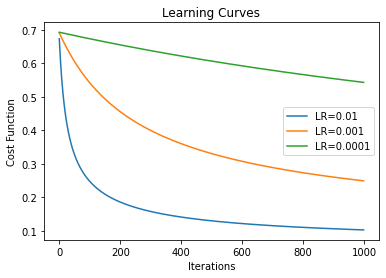

In [ ]:
#Batch gradient plotting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=100):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        
    def fit(self, X, y):
        # add a column of ones to X for the bias term
        X = np.insert(X, 0, 1, axis=1)
        # initialize the weights to zeros
        self.weights = np.zeros(X.shape[1])
        # initialize the cost history
        self.cost_history = []
        
        for i in range(self.num_iterations):
            # calculate the predicted probabilities
            y_pred = self.sigmoid(np.dot(X, self.weights))
            # calculate the gradient of the cost function
            gradient = np.dot(X.T, (y_pred - y)) / y.size
            # update the weights
            self.weights -= self.learning_rate * gradient
            # calculate the current cost
            cost = self.cost_function(X, y, self.weights)
            # append the current cost to the history
            self.cost_history.append(cost)
        
    def predict(self, X):
        # add a column of ones to X for the bias term
        X = np.insert(X, 0, 1, axis=1)
        # calculate the predicted probabilities
        y_pred = self.sigmoid(np.dot(X, self.weights))
        # round the probabilities to get the predicted class labels
        y_pred_rounded = np.round(y_pred)
        return y_pred_rounded
    
    def sigmoid(self, z):
        z = np.float128(z)
        return 1 / (1 + np.exp(-z))
    
    def cost_function(self, X, y, weights):
        y_pred = self.sigmoid(np.dot(X, weights))
        cost = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        return cost

# load the data
#data = np.genfromtxt('data.csv', delimiter=',', skip_header=1)
#X = data[:, :-1]
#y = data[:, -1]
# Load the dataset
url = 'https://drive.google.com/file/d/1iPAmd0wPdbgW9nFlarHXRBLYzFVwvjyK/view?usp=sharing'
file_id = url.split('/')[-2]
dwn_url = 'https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)

# Split the data into features and labels
X = df.drop(['diagnosis'], axis=1).values
y = df['diagnosis'].values

# Convert labels to 0/1
y = np.where(y == 'M', 1, 0)

# normalize the data
X = df.drop(['diagnosis'], axis=1).values
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
# initialize the logistic regression model with different learning rates
models = []
learning_rates = [0.01, 0.001, 0.0001]
for lr in learning_rates:
    model = LogisticRegression(learning_rate=lr, num_iterations=1000)
    models.append(model)

# train the models
for model in models:
    model.fit(X, y)

# plot the learning curves for each model
plt.figure()
for i, model in enumerate(models):
    plt.plot(range(model.num_iterations), model.cost_history, label='LR={}'.format(learning_rates[i]))
plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.title('Learning Curves')
plt.legend()
plt.show()

In [ ]:
s_f=0.67 #splitting factor(ratio between training data and test)
n_train = math.floor(s_f * X.shape[0])
n_test = math.ceil((1-s_f) * X.shape[0])
X_train = X[:n_train]
y_train = y[:n_train]
X_test = X[n_train:]
y_test = y[n_train:]
print("Total Number of rows in train:",X_train.shape[0])
print("Total Number of rows in test:",X_test.shape[0])

<ipython-input-2-95353a13c10b>:20: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


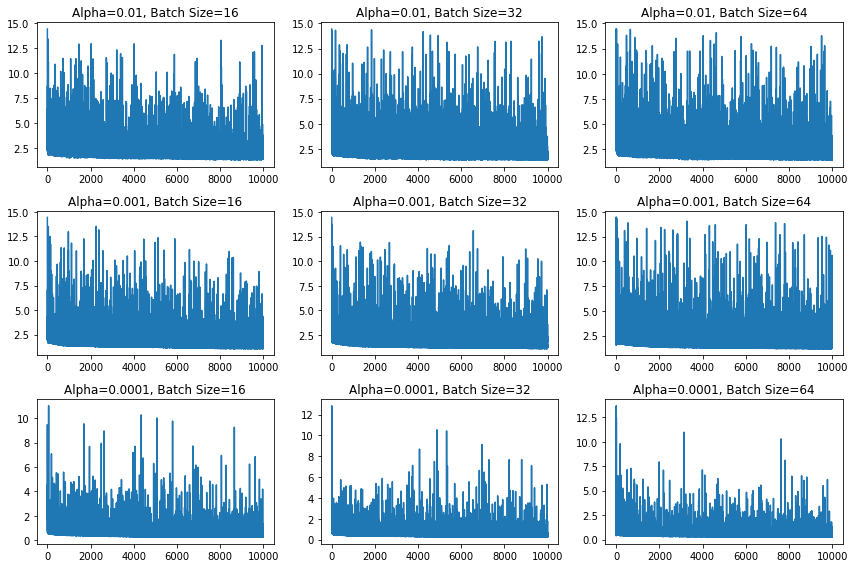

In [ ]:
#Mini-batch for all 3 learning rates. cost vs iterations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# load data
# Load the data
url = 'https://drive.google.com/file/d/1iPAmd0wPdbgW9nFlarHXRBLYzFVwvjyK/view?usp=sharing'
file_id = url.split('/')[-2]
dwn_url = 'https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)

# preprocess data
df.drop('id', axis=1, inplace=True)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

# define sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# define cost function
def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(X.dot(theta))
    epsilon = 1e-10
    J = -1/m * (y.dot(np.log(h+epsilon)) + (1-y).dot(np.log(1-h+epsilon)))

    #J = -1/m * (y.dot(np.log(h)) + (1-y).dot(np.log(1-h)))
    grad = 1/m * X.T.dot(h-y)
    return J, grad

# define minibatch gradient descent
def minibatch_gradient_descent(X, y, alpha, num_iters, batch_size):
    m, n = X.shape
    theta = np.zeros(n)
    costs = []
    for i in range(num_iters):
        # shuffle data
        idx = np.random.permutation(m)
        X = X[idx]
        y = y[idx]
        # get minibatches
        num_batches = int(m / batch_size)
        for j in range(num_batches):
            X_batch = X[j*batch_size:(j+1)*batch_size]
            y_batch = y[j*batch_size:(j+1)*batch_size]
            # update theta
            cost, grad = cost_function(X_batch, y_batch, theta)
            theta -= alpha * grad
        # calculate cost for entire dataset
        cost, _ = cost_function(X, y, theta)
        costs.append(cost)
    return theta, costs

# run minibatch gradient descent with different learning rates and batch sizes
alphas = [0.01, 0.001, 0.0001]
batch_sizes = [16, 32, 64]
fig, axs = plt.subplots(len(alphas), len(batch_sizes), figsize=(12,8))
for i, alpha in enumerate(alphas):
    for j, batch_size in enumerate(batch_sizes):
        theta, costs = minibatch_gradient_descent(X, y, alpha, 10000, batch_size)
        axs[i,j].plot(costs)
        axs[i,j].set_title(f'Alpha={alpha}, Batch Size={batch_size}')

plt.tight_layout()
plt.show()


Accuracy for alpha = 0.001: 0.954
Learned Parameters:
[ 0.00351172  0.15653689  0.10200816  0.1577931   0.1508228   0.0644359
  0.10179582  0.13018619  0.15871722  0.05795305 -0.03100648  0.11721231
 -0.00544599  0.1108078   0.11100841 -0.02053085  0.02447352  0.0140642
  0.05865942 -0.01398473 -0.02160506  0.1707041   0.11578195  0.16924158
  0.15823434  0.09380262  0.11227205  0.12710241  0.16597198  0.09593337
  0.05533588]


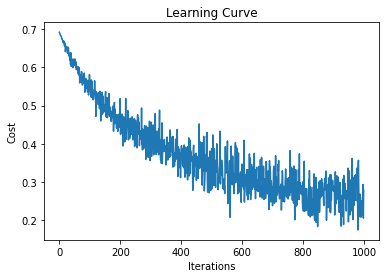

In [ ]:
#Mini Batch gradient normalised with accuracy
import numpy as np
import pandas as pd

# Load the dataset
url = 'https://drive.google.com/file/d/1iPAmd0wPdbgW9nFlarHXRBLYzFVwvjyK/view?usp=sharing'
file_id = url.split('/')[-2]
dwn_url = 'https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)

# Extract the feature matrix and labels
X = df.drop(['diagnosis'], axis=1).values
y = df['diagnosis'].values

# Convert labels to numerical values
y = np.where(y == 'M', 1, 0)
# normalize the data
X = df.drop(['diagnosis'], axis=1).values
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
# Define sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define cost function
def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(X.dot(theta))
    J = -1/m * (y.dot(np.log(h)) + (1-y).dot(np.log(1-h)))
    return J

# Define mini-batch gradient descent function
def minibatch_gradient_descent(X, y, alpha, epochs, batch_size):
    m, n = X.shape
    theta = np.zeros(n)
    costs = []
    for i in range(epochs):
        batch_indices = np.random.choice(m, batch_size, replace=False)
        X_batch = X[batch_indices]
        y_batch = y[batch_indices]
        h = sigmoid(X_batch.dot(theta))
        gradient = X_batch.T.dot(h - y_batch) / batch_size
        theta -= alpha * gradient
        cost = cost_function(X_batch, y_batch, theta)
        costs.append(cost)
    return theta, costs


# Set hyperparameters
alpha = 0.001
epochs = 1000
batch_size = 32

# Run mini-batch gradient descent
theta, costs = minibatch_gradient_descent(X, y, alpha, epochs, batch_size)

# compute accuracy
y_pred = np.round(sigmoid(X.dot(theta)))
accuracy = np.mean(y_pred == y)
print(f'Accuracy for alpha = {alpha}: {accuracy:.3f}')


# Print the learned parameters
print('Learned Parameters:')
print(theta)

# Plot the learning curve
import matplotlib.pyplot as plt
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Learning Curve')
plt.show()


<ipython-input-17-6311c30715af>:11: RuntimeWarning: divide by zero encountered in log
  J = -1/m * (y.dot(np.log(h)) + (1-y).dot(np.log(1-h)))


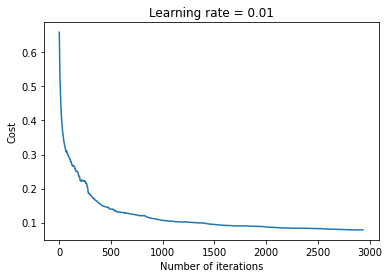

Training accuracy: 0.9912126537785588


In [ ]:
#Schotastic normalized --more time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(theta, X, y):
    m = len(y)
    h = sigmoid(X.dot(theta))
    J = -1/m * (y.dot(np.log(h)) + (1-y).dot(np.log(1-h)))
    return J

def stochastic_gradient_descent(X, y, alpha, num_iters):
    m, n = X.shape
    theta = np.zeros(n)
    costs = []
    for i in range(num_iters):
        for j in range(m):
            h = sigmoid(np.dot(X[j], theta))
            error = h - y[j]
            gradient = alpha * error * X[j]
            theta -= gradient
            costs.append(compute_cost(theta, X, y))
    return theta, costs

# Load the dataset
url = 'https://drive.google.com/file/d/1iPAmd0wPdbgW9nFlarHXRBLYzFVwvjyK/view?usp=sharing'
file_id = url.split('/')[-2]
dwn_url = 'https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)

# Extract the feature matrix and labels
X = df.drop(['diagnosis'], axis=1).values
y = df['diagnosis'].values

# Convert labels to numerical values
y = np.where(y == 'M', 1, 0)
# normalize the data
X = df.drop(['diagnosis'], axis=1).values
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

alpha = 0.01
num_iters = 1000

theta, costs = stochastic_gradient_descent(X, y, alpha, num_iters)

# Plot the learning curve
plt.plot(costs)
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.title(f'Learning rate = {alpha}')
plt.show()

# Compute the accuracy on the training set
y_pred = np.round(sigmoid(X.dot(theta)))
accuracy = (y_pred == y).mean()
print(f'Training accuracy: {accuracy}')


<ipython-input-19-3ebb99c404d9>:25: RuntimeWarning: divide by zero encountered in log
  cost = -1/m * (y.dot(np.log(h)) + (1-y).dot(np.log(1-h)))


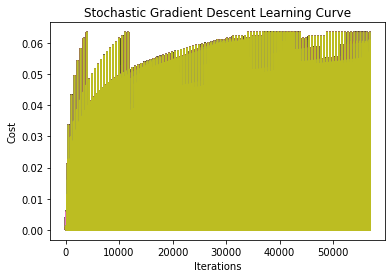

Training accuracy: 0.9876977152899824


In [ ]:
#Schotastic normalized --less time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def sigmoid(z):
    """
    Compute sigmoid function to squash the input into [0, 1] range.
    """
    z = np.clip(z, -500, 500) # clip values to prevent overflow/underflow errors
    return 1 / (1 + np.exp(-z))

def stochastic_gradient_descent(X, y, alpha, epochs):
    """
    Train a logistic regression model using stochastic gradient descent.
    """
    m, n = X.shape
    theta = np.zeros(n)
    costs = []
    for epoch in range(epochs):
        for i in range(m):
            h = sigmoid(np.dot(X[i], theta))
            error = h - y[i]
            gradient = X[i] * error
            theta -= alpha * gradient
            cost = -1/m * (y.dot(np.log(h)) + (1-y).dot(np.log(1-h)))
            costs.append(cost)
    return theta, costs

# Load the dataset
url = 'https://drive.google.com/file/d/1iPAmd0wPdbgW9nFlarHXRBLYzFVwvjyK/view?usp=sharing'
file_id = url.split('/')[-2]
dwn_url = 'https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)

# Extract the feature matrix and labels
X = df.drop(['diagnosis'], axis=1).values
y = df['diagnosis'].values

# Convert labels to numerical values
y = np.where(y == 'M', 1, 0)
# normalize the data
X = df.drop(['diagnosis'], axis=1).values
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Add intercept term
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Train model using stochastic gradient descent
theta, costs = stochastic_gradient_descent(X, y, 0.01, 100)

# Plot learning curve
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Stochastic Gradient Descent Learning Curve')
plt.show()
# Compute the accuracy on the training set
y_pred = np.round(sigmoid(X.dot(theta)))
accuracy = (y_pred == y).mean()
print(f'Training accuracy: {accuracy}')

<ipython-input-1-659b5fbb1031>:13: RuntimeWarning: divide by zero encountered in log
  J = -1/m * (y.dot(np.log(h)) + (1-y).dot(np.log(1-h)))


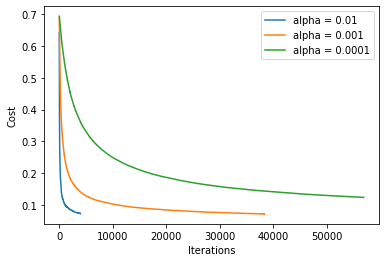

In [ ]:
#schotastic multiple learning rates
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the cost function
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X.dot(theta))
    J = -1/m * (y.dot(np.log(h)) + (1-y).dot(np.log(1-h)))
    return J

# Define the Stochastic Gradient Descent function
def stochastic_gradient_descent(X, y, alpha, iterations):
    m,n = X.shape
    theta = np.zeros(n)
    costs = []
    for i in range(iterations):
        for j in range(m):
            rand_index = np.random.randint(0, m)
            Xj = X[rand_index,:].reshape(1,n)
            yj = y[rand_index].reshape(1,1)
            hj = sigmoid(Xj.dot(theta))
            gradient = Xj.T.dot(hj-yj)
            theta = theta - alpha * gradient.reshape(n,)
            cost = compute_cost(X, y, theta)
            costs.append(cost)
    return theta, costs

# Load the dataset
url = 'https://drive.google.com/file/d/1iPAmd0wPdbgW9nFlarHXRBLYzFVwvjyK/view?usp=sharing'
file_id = url.split('/')[-2]
dwn_url = 'https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)

# Extract the feature matrix and labels
X = df.drop(['diagnosis'], axis=1).values
y = df['diagnosis'].values

# Convert labels to numerical values
y = np.where(y == 'M', 1, 0)
# normalize the data
X = df.drop(['diagnosis'], axis=1).values
# Normalize the data
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Add a column of ones to X for the intercept term
m,n = X.shape
X = np.hstack((np.ones((m,1)), X))

# Set the learning rates
alphas = [0.01, 0.001, 0.0001]

# Set the number of iterations
iterations = 100

# Train the model and plot the learning curves for each learning rate
for alpha in alphas:
    theta, costs = stochastic_gradient_descent(X, y, alpha, iterations)
    plt.plot(costs, label='alpha = ' + str(alpha))
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class LogisticRegression:
    
    def __init__(self, learning_rate=0.1, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
    
    def fit(self, X, y):
        m, n = X.shape
        self.theta = np.zeros(n)
        
        for i in range(self.num_iterations):
            z = np.dot(X, self.theta)
            h = sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / m
            self.theta -= self.learning_rate * gradient
    
    def predict(self, X, threshold=0.6):
        z = np.dot(X, self.theta)
        h = sigmoid(z)
        return (h >= threshold).astype(int)
    
    def score(self, X, y, threshold=0.6):
        y_pred = self.predict(X, threshold=threshold)
        accuracy = np.mean(y_pred == y)
        tp = np.sum((y_pred == 1) & (y == 1))
        fp = np.sum((y_pred == 1) & (y == 0))
        tn = np.sum((y_pred == 0) & (y == 0))
        fn = np.sum((y_pred == 0) & (y == 1))
        if tp + fp == 0:
          precision = 0.0
        else:
          precision = tp / (tp + fp)
        recall = tp / (tp + fn)
        return accuracy, precision, recall

# load the dataset
url = 'https://drive.google.com/file/d/1iPAmd0wPdbgW9nFlarHXRBLYzFVwvjyK/view?usp=sharing'
file_id = url.split('/')[-2]
dwn_url = 'https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)

# prepare the data
X = df.drop(['diagnosis'], axis=1).values
y = LabelEncoder().fit_transform(df['diagnosis'])

# normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# split the data into training and testing sets
np.random.seed(123)
shuffle_idx = np.random.permutation(len(X))
train_size = int(len(X) * 0.8)
X_train, y_train = X[shuffle_idx[:train_size]], y[shuffle_idx[:train_size]]
X_test, y_test = X[shuffle_idx[train_size:]], y[shuffle_idx[train_size:]]

# train the logistic regression model
lr = LogisticRegression(learning_rate=0.1, num_iterations=1000)
lr.fit(X_train, y_train)

# evaluate the model on the testing set with a decision threshold of 0.6
accuracy, precision, recall = lr.score(X_test, y_test, threshold=0.6)
print(f'Testing accuracy: {accuracy:.2f}')
print(f'Testing precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

Testing accuracy: 0.95
Testing precision: 0.90
Recall: 0.95


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class LogisticRegression:
    
    def __init__(self, learning_rate=0.1, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
    
    def fit(self, X, y):
        m, n = X.shape
        self.theta = np.zeros(n)
        
        for i in range(self.num_iterations):
            z = np.dot(X, self.theta)
            h = sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / m
            self.theta -= self.learning_rate * gradient
    
    def predict(self, X, threshold=0.5):
        z = np.dot(X, self.theta)
        h = sigmoid(z)
        return (h >= threshold).astype(int)
    
    def score(self, X, y, threshold=0.5):
        y_pred = self.predict(X, threshold=threshold)
        accuracy = np.mean(y_pred == y)
        tp = np.sum((y_pred == 1) & (y == 1))
        fp = np.sum((y_pred == 1) & (y == 0))
        tn = np.sum((y_pred == 0) & (y == 0))
        fn = np.sum((y_pred == 0) & (y == 1))
        if tp + fp == 0:
          precision = 0.0
        else:
          precision = tp / (tp + fp)
        recall = tp / (tp + fn)
        return accuracy, precision, recall

# load the dataset
url = 'https://drive.google.com/file/d/1qbzNjrV0-YN4zaRVZoqw4xxvBHqe8lC4/view?usp=sharing'
file_id = url.split('/')[-2]
dwn_url = 'https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)

# prepare the data
X = df.drop(['diagnosis'], axis=1).values
y = LabelEncoder().fit_transform(df['diagnosis'])

# normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# split the data into training and testing sets
np.random.seed(123)
shuffle_idx = np.random.permutation(len(X))
train_size = int(len(X) * 0.8)
X_train, y_train = X[shuffle_idx[:train_size]], y[shuffle_idx[:train_size]]
X_test, y_test = X[shuffle_idx[train_size:]], y[shuffle_idx[train_size:]]

# train the logistic regression model
lr = LogisticRegression(learning_rate=0.1, num_iterations=1000)
lr.fit(X_train, y_train)

# evaluate the model on the testing set with a decision threshold of 0.5
accuracy, precision, recall = lr.score(X_test, y_test, threshold=0.5)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.6052631578947368
Precision: 0.0
Recall: 0.0


In [ ]:
#Batch with precision and recall
import numpy as np
import pandas as pd

# define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class LogisticRegression:
    
    def __init__(self, learning_rate=0.1, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
    
    def fit(self, X, y):
        m, n = X.shape
        self.theta = np.zeros(n)
        
        for i in range(self.num_iterations):
            z = np.dot(X, self.theta)
            h = sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / m
            self.theta -= self.learning_rate * gradient
    
    def predict(self, X, threshold=0.5):
        z = np.dot(X, self.theta)
        h = sigmoid(z)
        return (h >= threshold).astype(int)
    
    def accuracy(self, X, y, threshold=0.5):
        y_pred = self.predict(X, threshold=threshold)
        return np.mean(y_pred == y)
    
    def precision(self, X, y, threshold=0.5):
        y_pred = self.predict(X, threshold=threshold)
        tp = np.sum((y_pred == 1) & (y == 1))
        fp = np.sum((y_pred == 1) & (y == 0))
        return tp / (tp + fp)
    
    def recall(self, X, y, threshold=0.5):
        y_pred = self.predict(X, threshold=threshold)
        tp = np.sum((y_pred == 1) & (y == 1))
        fn = np.sum((y_pred == 0) & (y == 1))
        return tp / (tp + fn)

# load the dataset
url = 'https://drive.google.com/file/d/1iPAmd0wPdbgW9nFlarHXRBLYzFVwvjyK/view?usp=sharing'
file_id = url.split('/')[-2]
dwn_url = 'https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)

# normalize the data
X = df.drop(['diagnosis'], axis=1).values
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# prepare the labels
y = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0).values

# split the data into training and testing sets
np.random.seed(123)
shuffle_idx = np.random.permutation(len(X))
train_size = int(len(X) * 0.8)
X_train, y_train = X[shuffle_idx[:train_size]], y[shuffle_idx[:train_size]]
X_test, y_test = X[shuffle_idx[train_size:]], y[shuffle_idx[train_size:]]

# train the logistic regression model
lr = LogisticRegression(learning_rate=0.0001, num_iterations=1000)
lr.fit(X_train, y_train)

# evaluate the model on the testing set
accuracy = lr.accuracy(X_test, y_test)
precision = lr.precision(X_test, y_test)
recall = lr.recall(X_test, y_test)

print(f'Testing accuracy: {accuracy:.2f}')
print(f'Testing precision: {precision:.2f}')
print(f'Testing recall: {recall:.2f}')


Testing accuracy: 0.91
Testing precision: 0.89
Testing recall: 0.84


<ipython-input-7-a7cc88c35690>:24: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-7-a7cc88c35690>:30: RuntimeWarning: divide by zero encountered in log
  J = -1/m * (y.dot(np.log(h)) + (1-y).dot(np.log(1-h)))


Accuracy for alpha = 0.01: 0.373
Precision for alpha = 0.01: 0.373
Recall for alpha = 0.01: 1.000
Testing accuracy: 0.37
Precision: 0.37
Recall: 1.00
Learned Parameters:
[ 2.82126642e+04  1.70546676e+00 -6.06835312e+00  1.75837973e+01
  7.12051500e+02 -4.86105703e-02  7.42380578e-02  1.99942348e-01
  1.08081265e-01 -9.25607031e-02 -4.77161656e-02  4.45010078e-01
 -9.50220219e-01  3.20738356e+00  8.87726103e+01 -6.33340406e-03
  5.93141462e-03  1.25657934e-02  2.94213313e-03 -1.53639456e-02
 -1.94827872e-03  5.87489938e+00 -5.89316094e+00  4.63193719e+01
  1.35515626e+03 -5.33008672e-02  2.59070744e-01  4.57952354e-01
  1.65287940e-01 -9.07940469e-02 -3.49713094e-02]


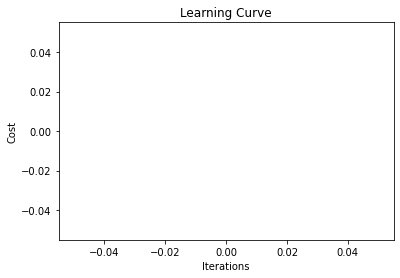

In [ ]:
#MINI BATCH along precisiona nd recall
import numpy as np
import pandas as pd

# Load the dataset
url = 'https://drive.google.com/file/d/1iPAmd0wPdbgW9nFlarHXRBLYzFVwvjyK/view?usp=sharing'
file_id = url.split('/')[-2]
dwn_url = 'https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)

# Extract the feature matrix and labels
X = df.drop(['diagnosis'], axis=1).values
y = df['diagnosis'].values

# Convert labels to numerical values
y = np.where(y == 'M', 1, 0)

# normalize the data
#X = df.drop(['diagnosis'], axis=1).values
#X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Define sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define cost function
def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(X.dot(theta))
    J = -1/m * (y.dot(np.log(h)) + (1-y).dot(np.log(1-h)))
    return J

# Define mini-batch gradient descent function
def minibatch_gradient_descent(X, y, alpha, epochs, batch_size):
    m, n = X.shape
    theta = np.zeros(n)
    costs = []
    for i in range(epochs):
        batch_indices = np.random.choice(m, batch_size, replace=False)
        X_batch = X[batch_indices]
        y_batch = y[batch_indices]
        h = sigmoid(X_batch.dot(theta))
        gradient = X_batch.T.dot(h - y_batch) / batch_size
        theta -= alpha * gradient
        cost = cost_function(X_batch, y_batch, theta)
        costs.append(cost)
    return theta, costs


# Set hyperparameters
alpha = 0.01
epochs = 1000
batch_size = 32

# Split the data into training and testing sets
np.random.seed(123)
shuffle_idx = np.random.permutation(len(X))
train_size = int(len(X) * 0.8)
X_train, y_train = X[shuffle_idx[:train_size]], y[shuffle_idx[:train_size]]
X_test, y_test = X[shuffle_idx[train_size:]], y[shuffle_idx[train_size:]]

# Run mini-batch gradient descent on the training set
# Run mini-batch gradient descent
theta, costs = minibatch_gradient_descent(X, y, alpha, epochs, batch_size)

# compute accuracy, precision, and recall
y_pred = np.round(sigmoid(X.dot(theta)) + 0.5 - 0.5)
accuracy = np.mean(y_pred == y)
precision = np.sum((y_pred == 1) & (y == 1)) / np.sum(y_pred == 1)
recall = np.sum((y_pred == 1) & (y == 1)) / np.sum(y == 1)
print(f'Accuracy for alpha = {alpha}: {accuracy:.3f}')
print(f'Precision for alpha = {alpha}: {precision:.3f}')
print(f'Recall for alpha = {alpha}: {recall:.3f}')


print(f'Testing accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

# Print the learned parameters
print('Learned Parameters:')
print(theta)

# Plot the learning curve
import matplotlib.pyplot as plt
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Learning Curve')
plt.show()


<ipython-input-9-8dd4714290aa>:26: RuntimeWarning: divide by zero encountered in log
  cost = -1/m * (y.dot(np.log(h)) + (1-y).dot(np.log(1-h)))


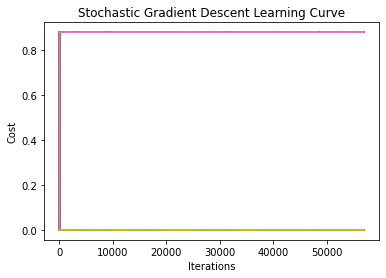

Training accuracy: 0.37258347978910367
Training precision: 1.0
Training recall: 1.0


In [ ]:
#Stochastic 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def sigmoid(z):
    """
    Compute sigmoid function to squash the input into [0, 1] range.
    """
    z = np.clip(z, -500, 500) # clip values to prevent overflow/underflow errors
    return 1 / (1 + np.exp(-z))

def stochastic_gradient_descent(X, y, alpha, epochs):
    """
    Train a logistic regression model using stochastic gradient descent.
    """
    m, n = X.shape
    theta = np.zeros(n)
    costs = []
    for epoch in range(epochs):
        for i in range(m):
            h = sigmoid(np.dot(X[i], theta))
            error = h - y[i]
            gradient = X[i] * error
            theta -= alpha * gradient
            cost = -1/m * (y.dot(np.log(h)) + (1-y).dot(np.log(1-h)))
            costs.append(cost)
    return theta, costs

# Load the dataset
url = 'https://drive.google.com/file/d/1iPAmd0wPdbgW9nFlarHXRBLYzFVwvjyK/view?usp=sharing'
file_id = url.split('/')[-2]
dwn_url = 'https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)

# Extract the feature matrix and labels
X = df.drop(['diagnosis'], axis=1).values
y = df['diagnosis'].values

# Convert labels to numerical values
y = np.where(y == 'M', 1, 0)
# normalize the data
#X = df.drop(['diagnosis'], axis=1).values
#X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Add intercept term
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Train model using stochastic gradient descent
theta, costs = stochastic_gradient_descent(X, y, 0.01, 100)

# Plot learning curve
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Stochastic Gradient Descent Learning Curve')
plt.show()

# Compute the accuracy, precision, and recall on the training set
y_pred = np.round(sigmoid(X.dot(theta)))
#y_pred = (sigmoid(X.dot(theta)) >= 0.4).astype(int)
accuracy = (y_pred == y).mean()
precision = (y_pred[y == 1] == y[y == 1]).mean()
recall = (y_pred[y == 1] == y[y == 1]).sum() / y.sum()
print(f'Training accuracy: {accuracy}')
print(f'Training precision: {precision}')
print(f'Training recall: {recall}')


<ipython-input-10-aac26688572f>:25: RuntimeWarning: divide by zero encountered in log
  cost = -1/m * (y.dot(np.log(h)) + (1-y).dot(np.log(1-h)))


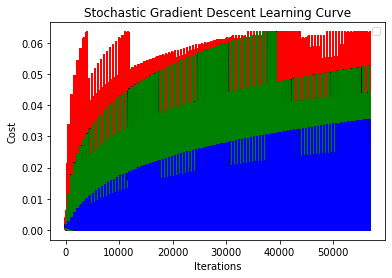

Training accuracy: 0.9718804920913884
Training precision: 0.9528301886792453
Training recall: 0.9528301886792453


In [ ]:
#Stochastic plotting for varied learning rates
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def sigmoid(z):
    """
    Compute sigmoid function to squash the input into [0, 1] range.
    """
    z = np.clip(z, -500, 500) # clip values to prevent overflow/underflow errors
    return 1 / (1 + np.exp(-z))

def stochastic_gradient_descent(X, y, alpha, epochs):
    """
    Train a logistic regression model using stochastic gradient descent.
    """
    m, n = X.shape
    theta = np.zeros(n)
    costs = []
    for epoch in range(epochs):
        for i in range(m):
            h = sigmoid(np.dot(X[i], theta))
            error = h - y[i]
            gradient = X[i] * error
            theta -= alpha * gradient
            cost = -1/m * (y.dot(np.log(h)) + (1-y).dot(np.log(1-h)))
            costs.append(cost)
    return theta, costs

# Load the dataset
url = 'https://drive.google.com/file/d/1iPAmd0wPdbgW9nFlarHXRBLYzFVwvjyK/view?usp=sharing'
file_id = url.split('/')[-2]
dwn_url = 'https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)

# Extract the feature matrix and labels
X = df.drop(['diagnosis'], axis=1).values
y = df['diagnosis'].values

# Convert labels to numerical values
y = np.where(y == 'M', 1, 0)
# normalize the data
X = df.drop(['diagnosis'], axis=1).values
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Add intercept term
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Train model using stochastic gradient descent
learning_rates = [0.01, 0.001, 0.0001]
colors = ['r', 'g', 'b']
epochs = 100
for i, alpha in enumerate(learning_rates):
    theta, costs = stochastic_gradient_descent(X, y, alpha, epochs)
    plt.plot(costs, colors[i])

plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Stochastic Gradient Descent Learning Curve')
plt.legend()
plt.show()

# Compute the accuracy, precision, and recall on the training set
y_pred = np.round(sigmoid(X.dot(theta)))
accuracy = (y_pred == y).mean()
precision = (y_pred[y == 1] == y[y == 1]).mean()
recall = (y_pred[y == 1] == y[y == 1]).sum() / y.sum()
print(f'Training accuracy: {accuracy}')
print(f'Training precision: {precision}')
print(f'Training recall: {recall}')
